In [2]:
import numpy as np
import dxchange
import holotomo
import matplotlib.pyplot as plt
import cupy as cp
import scipy.ndimage as ndimage
import numpy as np
import sys
import tomoalign
from matplotlib_scalebar.scalebar import ScaleBar
%matplotlib inline

ntheta = 1500
n = 1536
ne = 2528
nz = 1232
ndist = 4
ngpus = 2
pnz = 32
same_prb = True

In [3]:

nz=1232
ngpus=2
iter = 192
center = 791
data = np.zeros([1500,nz,n],dtype='float32')
shiftc = int(center-n//2)

theta = np.loadtxt(f'/data/viktor/id16a/3d_ald4/3d_ald4_ht_10nm_/angles_file.txt').astype('float32')[:]/180*np.pi

for st in range(0,1500//250):
    data[st:1500:1500//250] = dxchange.read_tiff(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{250}_{ndist}_{st}/r{iter:05}.tiff')[:,800:800+nz,ne//2-n//2+shiftc:ne//2+n//2+shiftc]


(1500, 1232, 1536)


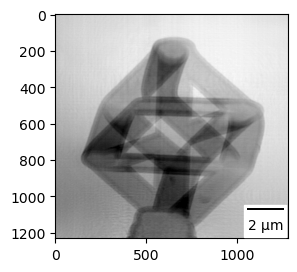

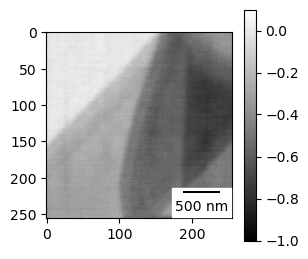

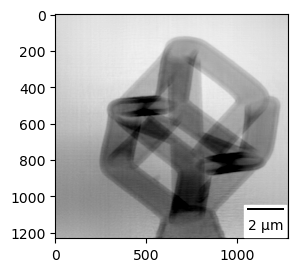

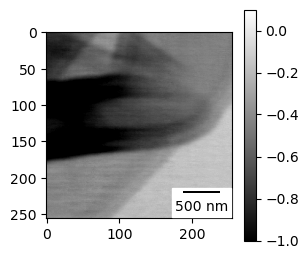

In [4]:

voxelsize=1e-8
vvmin=-1
vvmax=0.1
stx = 500
sty = 200
size = 256
cut=128
print(data.shape)
fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(data[0,:,cut:-cut],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
plt.savefig(f'figs/recpsi0.png',dpi=300,bbox_inches='tight')

fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(data[0,sty:sty+size,stx:stx+size],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/recpsis0.png',dpi=300,bbox_inches='tight')


fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(data[1050,:,cut:-cut],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
plt.savefig(f'figs/recpsi90.png',dpi=300,bbox_inches='tight')
stx = 1050
sty = 700
size = 256
fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(data[1050,sty:sty+size,stx:stx+size],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/recpsis90.png',dpi=300,bbox_inches='tight')

In [5]:

iter = 144
for st in range(0,1500//250):
    data[st:1500:1500//250] = dxchange.read_tiff(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{250}_{ndist}_{st}/r{iter:05}noprobe.tiff')[:,800:800+nz,ne//2-n//2+shiftc:ne//2+n//2+shiftc]


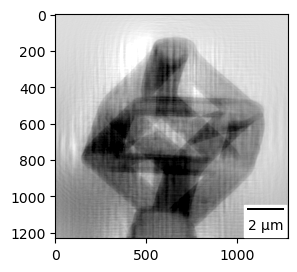

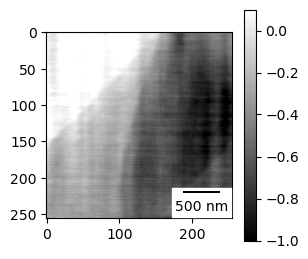

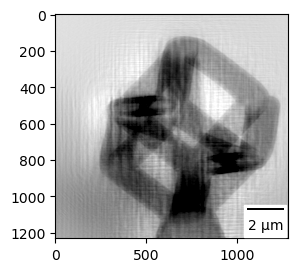

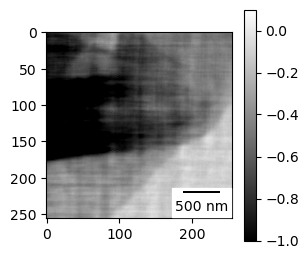

In [6]:

voxelsize=1e-8
vvmin=-1
vvmax=0.1
stx = 500
sty = 200
size = 256

fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(data[0,:,cut:-cut],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
plt.savefig(f'figs/recpsi0noprobe.png',dpi=300,bbox_inches='tight')

fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(data[0,sty:sty+size,stx:stx+size],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/recpsis0noprobe.png',dpi=300,bbox_inches='tight')


fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(data[1050,:,cut:-cut],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
plt.savefig(f'figs/recpsi90noprobe.png',dpi=300,bbox_inches='tight')
stx = 1050
sty = 700
size = 256
fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(data[1050,sty:sty+size,stx:stx+size],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/recpsis90noprobe.png',dpi=300,bbox_inches='tight')

In [7]:
c = 0.001157390898890103
rec = dxchange.read_tiff(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/cgfinal/r_{400:04}.tiff')[64:-64,256:-128,256:-128]*c

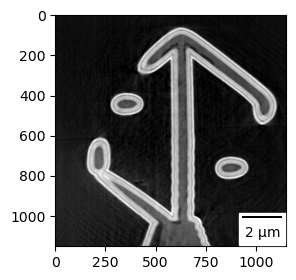

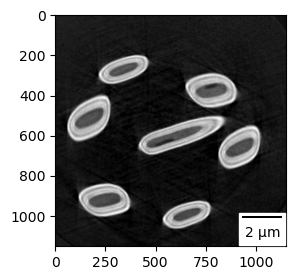

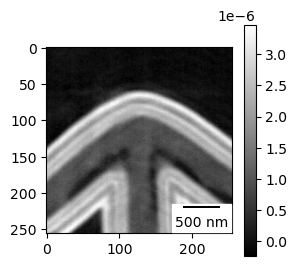

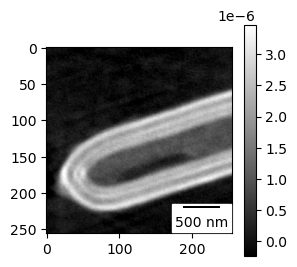

In [8]:

voxelsize=1e-8
vvmin=-2e-4*c
vvmax=3e-3*c
fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(-rec[:,:,750-256],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
plt.savefig(f'figs/recv.png',dpi=300,bbox_inches='tight')

fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(-rec[650-64,:],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
plt.savefig(f'figs/rech.png',dpi=300,bbox_inches='tight')

stx = 500
sty = 0
size = 256
fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(-rec[:,:,750-256][sty:sty+size,stx:stx+size],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/recvs.png',dpi=300,bbox_inches='tight')



stx = 400
sty = 470
size = 256
fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(-rec[650-64,:][sty:sty+size,stx:stx+size],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/rechs.png',dpi=300,bbox_inches='tight')




In [9]:
rec = dxchange.read_tiff(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/cgfinalnoprobe/r_{400:04}.tiff')[64:-64,256:-128,256:-128]*c

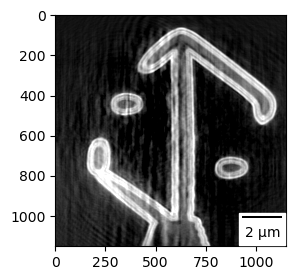

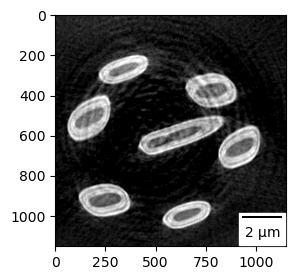

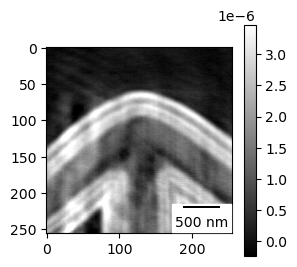

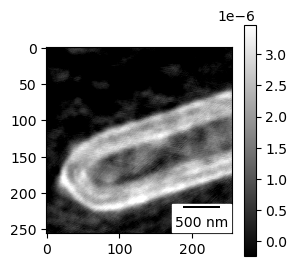

In [10]:
voxelsize=1e-8
vvmin=-2e-4*c
vvmax=3e-3*c
fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(-rec[:,:,750-256],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
plt.savefig(f'figs/recvnoprobe.png',dpi=300,bbox_inches='tight')

fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(-rec[650-64,:],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
plt.savefig(f'figs/rechnoprobe.png',dpi=300,bbox_inches='tight')

stx = 500
sty = 0
size = 256
fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(-rec[:,:,750-256][sty:sty+size,stx:stx+size],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/recvsnoprobe.png',dpi=300,bbox_inches='tight')



stx = 400
sty = 470
size = 256
fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(-rec[650-64,:][sty:sty+size,stx:stx+size],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/rechsnoprobettt.png',dpi=300,bbox_inches='tight')


/data/vnikitin/holo/3d_ald/rfinal_probe_True_1536_250_4_0/pang00192.tiff
(1232, 1280)
/data/vnikitin/holo/3d_ald/rfinal_probe_True_1536_250_4_0/pang00192.tiff


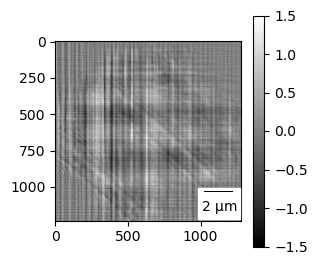

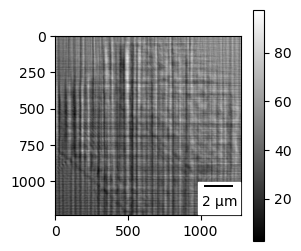

In [29]:
iter = 192
st = 0
nz=1232
print(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{250}_{ndist}_{st}/pang{iter:05}.tiff')
prb = dxchange.read_tiff(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{250}_{ndist}_{st}/pang{iter:05}.tiff')[-(ne//2-n//2)+800:-(ne//2-n//2)+800+nz,cut:-cut]#,ne//2-n//2+shiftc:ne//2+n//2+shiftc]
print(prb.shape)

fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(prb,cmap='gray',vmin=-1.5,vmax=1.5)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/prbang.png',dpi=300,bbox_inches='tight')


iter = 192
st = 0
print(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{250}_{ndist}_{st}/pang{iter:05}.tiff')
prb = dxchange.read_tiff(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{250}_{ndist}_{st}/pabs{iter:05}.tiff')[-(ne//2-n//2)+800:-(ne//2-n//2)+800+nz,cut:-cut]#,ne//2-n//2+shiftc:ne//2+n//2+shiftc]


fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(prb,cmap='gray')
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/prbabs.png',dpi=300,bbox_inches='tight')

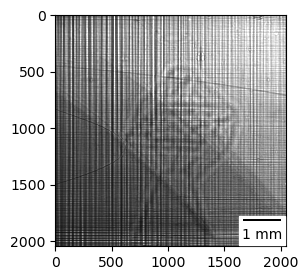

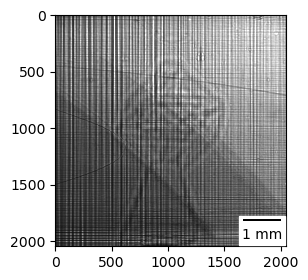

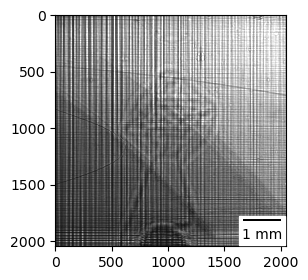

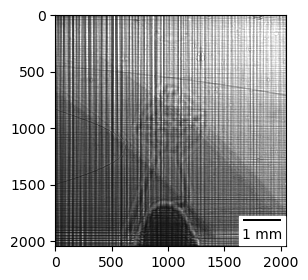

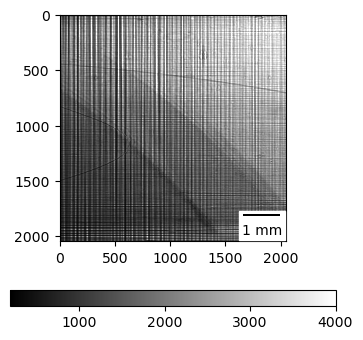

In [30]:
# ID16a setup
detector_pixelsize = 3e-6
energy = 17.05 #[keV] xray energy
focusToDetectorDistance = 1.208 # [m]
sx0 = -2.493e-3
z1 = np.array([1.5335e-3,1.7065e-3,2.3975e-3,3.8320e-3])[:ndist]-sx0
z2 = focusToDetectorDistance-z1
distances = (z1*z2)/focusToDetectorDistance
magnifications = focusToDetectorDistance/z1

for k in range(4):
    fname = f'/data/viktor/id16a/3d_ald4/3d_ald4_ht_10nm_{k+1}_/3d_ald4_ht_10nm_{k+1}_{0:04}.edf'
    tmp = dxchange.read_edf(fname)[0]
    
    fig, ax = plt.subplots(1, figsize=(3, 3))
    plt.imshow(tmp,cmap='gray',vmin=0,vmax=4000)#,vmin=-1.5,vmax=1.5)
    ax.add_artist(ScaleBar(voxelsize*magnifications[0],location='lower right'))
    # plt.colorbar(orientation='horizontal')
    plt.savefig(f'figs/data{k}.png',dpi=300,bbox_inches='tight')

fname = f'/data/viktor/id16a/3d_ald4/3d_ald4_ht_10nm_1_/refHST0000.edf'
tmp = dxchange.read_edf(fname)[0]

fig, ax = plt.subplots(1, figsize=(4.2, 4.2))
plt.imshow(tmp,cmap='gray',vmax=4000)#,vmin=-1.5,vmax=1.5)
ax.add_artist(ScaleBar(voxelsize*magnifications[0],location='lower right'))
plt.colorbar(orientation='horizontal')
plt.savefig(f'figs/ref.png',dpi=300,bbox_inches='tight')
